Import Libraries

In [2]:
import os
import cv2
# from google.colab.patches import cv2_imshow
import numpy as np
from numpy import linalg as LA
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from random import sample
import random
from sklearn.decomposition import KernelPCA

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### KNN function

In [4]:
def knn(reducedTrainD, reducedTestD, labelsTrain, labelsTest, k ):
  c=KNeighborsClassifier(n_neighbors = k)
  c.fit(reducedTrainD,labelsTrain)
  labelsPred=c.predict(reducedTestD)
  accuracy = metrics.accuracy_score(labelsTest, labelsPred)
  return accuracy

## Part 2 : Generate the Data Matrix and the Label vector

In [5]:
D = [] # Data matrix
y = [] # Labels
for i in range(1,41): # 40 people
  for j in range(1,11): # 10 images per person
    img_name = "/content/drive/MyDrive/faces/s"+str(i)+"/"+str(j)+".pgm" # Image name
    img = cv2.imread(img_name,cv2.IMREAD_GRAYSCALE) # Read image
    img = img.flatten() # Flatten image
    D.append(img) # Add image to data matrix
    y.append(i) # Add label to labels
D = np.array(D) # Convert to numpy array
y = np.array(y) # Convert to numpy array

## Part 3 : Split the Dataset into Training and Test sets

In [6]:
testData = np.array([D[i] for i in range(0,400,2)]) # Test data
trainData = np.array([D[i] for i in range(1,400,2)]) # Train data

testLabel = np.array([y[i] for i in range(0,400,2)]) # Test labels
trainLabel = np.array([y[i] for i in range(1,400,2)]) # Train labels

In [7]:
print(trainData.shape)
print(testData.shape)

(200, 10304)
(200, 10304)


#Part 4: Classification using PCA

compute mean

In [8]:
trainMean = np.mean(trainData, axis=0) # Compute Train mean
testMean= np.mean(testData, axis=0) # Compute Test mean
print(trainMean)
print(testMean)
trainMean.shape

[82.04  84.87  85.23  ... 77.23  74.35  73.355]
[83.525 86.24  86.705 ... 76.515 77.32  76.985]


(10304,)

Center the Data

In [9]:
trainCenter= trainData - trainMean # Center train data
testCenter= testData- testMean # Center test data

Compute Covariance Matrix

In [10]:
cova=np.cov(trainCenter, rowvar=False, bias=True) # Compute covariance matrix

Get Eigen vectors and Eigen Values of covariance matrix

In [11]:
eigenVal, eigenVec = np.linalg.eigh(cova) # Compute eigenvalues and eigenvectors
indices = eigenVal.argsort()[::-1] # Get the indices that would sort an array in descending order
eigenVal=eigenVal[indices] # get eigenvalues in descending order
eigenVec=eigenVec[:,indices] # get eigenvectors in descending order
print(eigenVal)
print("\n")
print(eigenVec)
eigenVec.shape

[ 2.76913438e+06  2.14583158e+06  1.06497557e+06 ... -1.04389089e-09
 -1.49625428e-09 -1.89389774e-09]


[[ 0.00137559 -0.01038075 -0.01557967 ...  0.          0.
   0.        ]
 [ 0.0012908  -0.01510292 -0.01906547 ...  0.11103299  0.14232354
  -0.35438565]
 [ 0.00151768 -0.01517555 -0.01899798 ...  0.04343785 -0.28419215
   0.53742984]
 ...
 [ 0.00874152  0.00954999 -0.01296274 ... -0.02061136 -0.02074192
   0.0178128 ]
 [ 0.0072042   0.00769078 -0.01386214 ... -0.01111982  0.0152232
   0.00250571]
 [ 0.00844687  0.0068302  -0.01451087 ...  0.01159439  0.01729143
  -0.01306936]]


(10304, 10304)

Project the training set, and test sets separately for differenet alpha

In [12]:
alpha=np.array([0.8,0.85,0.9,0.95])
accuracies=np.array([])
totval= np.sum(eigenVal)
explained=0
for a in alpha:
  r=0
  sum=0
  while explained <= a:
    sum = sum+eigenVal[r]
    explained=sum/totval
    r=r+1
  
  if a==0.8:
    p1=eigenVec[:,:r]
    reducedTrain1=np.dot(trainCenter, p1)
    reducedTest1=np.dot(testCenter, p1)
    a1=knn(reducedTrain1,reducedTest1,trainLabel, testLabel,1)
    r1=r
  elif a==0.85:
    p2=eigenVec[:,:r]
    reducedTrain2=np.dot(trainCenter, p2)
    reducedTest2=np.dot(testCenter, p2)
    r2=r
  elif a==0.9:
    p3=eigenVec[:,:r]
    reducedTrain3=np.dot(trainCenter, p3)
    reducedTest3=np.dot(testCenter, p3)
    r3=r
  else:
    p4=eigenVec[:,:r]
    reducedTrain4=np.dot(trainCenter, p4)
    reducedTest4=np.dot(testCenter, p4)
    r4=r

In [47]:

for a in alpha:
  print("\n")
  print("alpha =", a)
  print("n-neighbors=", 1)
  if a==0.8:
    a1=knn(reducedTrain1,reducedTest1,trainLabel, testLabel,1)
    accuracies=np.append(accuracies,a1)
    print("dimensions=", r1)
    print("accuracy:", a1)
  elif a==0.85:
    a2=knn(reducedTrain2,reducedTest2,trainLabel, testLabel,1)
    accuracies=np.append(accuracies,a2)
    print("dimensions=", r2)
    print("accuracy:", a2)
  elif a==0.9:
    a3=knn(reducedTrain3,reducedTest3,trainLabel, testLabel,1)
    accuracies=np.append(accuracies,a3)
    print("dimensions=", r3)
    print("accuracy:", a3)
  else:
      a4=knn(reducedTrain4,reducedTest4,trainLabel, testLabel,1)
      accuracies=np.append(accuracies,a4)
      print("dimensions=", r4)
      print("accuracy:", a4)



alpha = 0.8
n-neighbors= 1
dimensions= 37
accuracy: 0.93


alpha = 0.85
n-neighbors= 1
dimensions= 53
accuracy: 0.94


alpha = 0.9
n-neighbors= 1
dimensions= 77
accuracy: 0.94


alpha = 0.95
n-neighbors= 1
dimensions= 116
accuracy: 0.935


Relation between alpha and classification accuracy

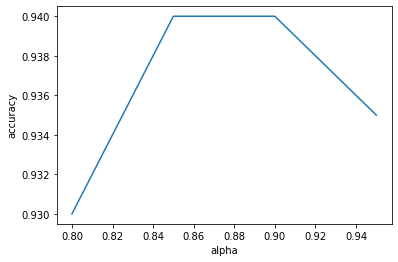

In [14]:
plt.plot(alpha, accuracies)
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.show()

## Classification Using LDA

Calculate the mean vector for every class Mu1, Mu2, ..., Mu40


In [15]:
Mu = np.zeros((40,10304)) # 40 means, each of size 10304
for i in range(40): # For each person
  Mu[i] = np.mean(trainData[i*5:i*5+5], axis=0) # Compute mean of 5 images

In [16]:
Mu

array([[ 42.2,  46.6,  42.4, ...,  61.8,  56.4,  57.2],
       [ 35.2,  35.8,  35.6, ...,  71.8,  71.6,  71.6],
       [105.2, 104. , 107.4, ...,  50. ,  48.4,  50. ],
       ...,
       [109.8, 108.6, 109.6, ...,  68.2,  68. ,  65. ],
       [ 84.6,  83.4,  85.2, ..., 115.8, 119.8, 117.4],
       [126. , 123.6, 125.8, ...,  47.8,  46. ,  49. ]])

Generate class specific subsets


In [17]:
D = np.zeros((40,5,10304)) # 40 people, 5 images per person, each image of size 10304
for i in range(40):
  D[i] = trainData[i*5:i*5+5]
  

In [18]:
D

array([[[ 60.,  60.,  62., ...,  32.,  34.,  34.],
        [ 63.,  53.,  35., ...,  41.,  10.,  24.],
        [ 10.,  43.,  50., ..., 156., 155., 158.],
        [ 44.,  43.,  32., ...,  43.,  43.,  37.],
        [ 34.,  34.,  33., ...,  37.,  40.,  33.]],

       [[ 37.,  35.,  35., ...,  26.,  28.,  28.],
        [ 34.,  36.,  35., ...,  32.,  25.,  25.],
        [ 34.,  35.,  35., ...,  31.,  24.,  24.],
        [ 34.,  39.,  35., ..., 135., 138., 148.],
        [ 37.,  34.,  38., ..., 135., 143., 133.]],

       [[100.,  99., 108., ...,  44.,  42.,  44.],
        [105., 102., 108., ...,  42.,  35.,  37.],
        [110., 106., 109., ...,  49.,  53.,  53.],
        [107., 104., 109., ...,  58.,  56.,  57.],
        [104., 109., 103., ...,  57.,  56.,  59.]],

       ...,

       [[104., 106., 107., ...,  65.,  59.,  73.],
        [110., 111., 114., ...,  65.,  72.,  65.],
        [114., 112., 110., ...,  67.,  70.,  68.],
        [113., 109., 113., ...,  72.,  66.,  71.],
        [108

Mean Vector for every class

In [19]:
μ = np.mean(D, axis=1)

In [20]:
μ

array([[ 42.2,  46.6,  42.4, ...,  61.8,  56.4,  57.2],
       [ 35.2,  35.8,  35.6, ...,  71.8,  71.6,  71.6],
       [105.2, 104. , 107.4, ...,  50. ,  48.4,  50. ],
       ...,
       [109.8, 108.6, 109.6, ...,  68.2,  68. ,  65. ],
       [ 84.6,  83.4,  85.2, ..., 115.8, 119.8, 117.4],
       [126. , 123.6, 125.8, ...,  47.8,  46. ,  49. ]])

Calculate the between class metrices

In [21]:
Sb = np.zeros((10304,10304)) # Between class scatter matrix
for i in range(40):
  Sb[i] = 5*np.matmul((μ[i] - trainMean).T, (μ[i] - trainMean))

In [22]:
Sb

array([[73439123.41825002, 73439123.41825002, 73439123.41825002, ...,
        73439123.41825002, 73439123.41825002, 73439123.41825002],
       [40531262.14825   , 40531262.14825   , 40531262.14825   , ...,
        40531262.14825   , 40531262.14825   , 40531262.14825   ],
       [23003178.70825   , 23003178.70825   , 23003178.70825   , ...,
        23003178.70825   , 23003178.70825   , 23003178.70825   ],
       ...,
       [       0.        ,        0.        ,        0.        , ...,
               0.        ,        0.        ,        0.        ],
       [       0.        ,        0.        ,        0.        , ...,
               0.        ,        0.        ,        0.        ],
       [       0.        ,        0.        ,        0.        , ...,
               0.        ,        0.        ,        0.        ]])

Compute cener class matrices

In [23]:
# Compute Z
Z = np.zeros((40,5,10304)) # 40 people, 5 images per person, each image of size 10304
for i in range(40):
    Z[i] = D[i] - μ[i].T 

In [24]:
Z

array([[[ 17.8,  13.4,  19.6, ..., -29.8, -22.4, -23.2],
        [ 20.8,   6.4,  -7.4, ..., -20.8, -46.4, -33.2],
        [-32.2,  -3.6,   7.6, ...,  94.2,  98.6, 100.8],
        [  1.8,  -3.6, -10.4, ..., -18.8, -13.4, -20.2],
        [ -8.2, -12.6,  -9.4, ..., -24.8, -16.4, -24.2]],

       [[  1.8,  -0.8,  -0.6, ..., -45.8, -43.6, -43.6],
        [ -1.2,   0.2,  -0.6, ..., -39.8, -46.6, -46.6],
        [ -1.2,  -0.8,  -0.6, ..., -40.8, -47.6, -47.6],
        [ -1.2,   3.2,  -0.6, ...,  63.2,  66.4,  76.4],
        [  1.8,  -1.8,   2.4, ...,  63.2,  71.4,  61.4]],

       [[ -5.2,  -5. ,   0.6, ...,  -6. ,  -6.4,  -6. ],
        [ -0.2,  -2. ,   0.6, ...,  -8. , -13.4, -13. ],
        [  4.8,   2. ,   1.6, ...,  -1. ,   4.6,   3. ],
        [  1.8,   0. ,   1.6, ...,   8. ,   7.6,   7. ],
        [ -1.2,   5. ,  -4.4, ...,   7. ,   7.6,   9. ]],

       ...,

       [[ -5.8,  -2.6,  -2.6, ...,  -3.2,  -9. ,   8. ],
        [  0.2,   2.4,   4.4, ...,  -3.2,   4. ,   0. ],
        [  4

Compute class scatter matrices

In [25]:
S = np.zeros((10304,10304))  # Within class scatter matrix
for i in range(40):
  S += np.matmul(Z[i].T, Z[i])
  

In [26]:
S

array([[ 4.400240e+04,  2.592360e+04,  2.591180e+04, ..., -1.108840e+04,
        -1.056340e+04, -5.994000e+03],
       [ 2.592360e+04,  2.846440e+04,  2.749520e+04, ..., -3.349400e+03,
        -3.021200e+03,  1.088800e+03],
       [ 2.591180e+04,  2.749520e+04,  2.879560e+04, ..., -2.599600e+03,
         2.800000e+00,  4.358000e+03],
       ...,
       [-1.108840e+04, -3.349400e+03, -2.599600e+03, ...,  1.396120e+05,
         8.342360e+04,  6.300300e+04],
       [-1.056340e+04, -3.021200e+03,  2.800000e+00, ...,  8.342360e+04,
         1.000320e+05,  8.194700e+04],
       [-5.994000e+03,  1.088800e+03,  4.358000e+03, ...,  6.300300e+04,
         8.194700e+04,  1.019096e+05]])

compute S inverse

In [27]:
S_inverse = np.linalg.inv(S)

In [28]:
S_inverse

array([[-1.27854752e+10, -2.06378332e+10,  3.33454853e+09, ...,
         7.01089388e+09,  7.23090378e+08, -1.01144894e+10],
       [-2.97733121e+09, -1.07416811e+10,  2.91538305e+09, ...,
         2.70583045e+09, -6.07037734e+09,  3.55680551e+09],
       [ 3.98566474e+09,  2.02272823e+10,  5.38136667e+09, ...,
        -5.57005939e+09,  8.17908026e+08,  4.56703499e+09],
       ...,
       [ 1.49879320e+09, -4.25082820e+09,  5.99977284e+08, ...,
         3.78420213e+08, -9.47613577e+07,  1.02371596e+08],
       [ 7.78559351e+08, -2.97861205e+09,  1.15401726e+08, ...,
         2.48949926e+08, -8.31832559e+08,  4.36603250e+08],
       [ 8.53181399e+08, -7.83850133e+08,  6.38783663e+08, ...,
        -1.02842216e+08, -1.90695299e+08, -7.69241863e+07]])

Compute eigenvalues and eigenvectors

In [29]:
eigVal, eigVec = np.linalg.eigh((S_inverse @ Sb))

In [30]:
eigVal

array([-1.85705482e+21, -6.09287987e+20, -3.73440875e+20, ...,
        3.73703395e+20,  6.10835362e+20,  1.86624908e+21])

In [31]:
eigVec

array([[-0.00974741, -0.01165501,  0.01208648, ..., -0.01165829,
         0.0117355 ,  0.00964319],
       [-0.00973738, -0.01161847,  0.01202467, ..., -0.01171788,
         0.0117722 ,  0.00965305],
       [-0.00973369, -0.01160501,  0.01200192, ..., -0.01173991,
         0.01178576,  0.0096567 ],
       ...,
       [-0.00481527,  0.00439576,  0.00475989, ...,  0.00457398,
         0.0041921 , -0.00481078],
       [-0.00406733,  0.00371313,  0.00402086, ...,  0.00386306,
         0.00354067, -0.00406337],
       [-0.00414181,  0.00378112,  0.00409448, ...,  0.00393384,
         0.00360553, -0.0041378 ]])

Use 39 dominant eigenvectors instead of just one

In [32]:
weights = eigVec[:,-39:]
weights

array([[ 0.04175963, -0.01086951,  0.00680039, ..., -0.01165829,
         0.0117355 ,  0.00964319],
       [ 0.04491409, -0.0116765 ,  0.00729376, ..., -0.01171788,
         0.0117722 ,  0.00965305],
       [ 0.04612173, -0.01198525,  0.00748236, ..., -0.01173991,
         0.01178576,  0.0096567 ],
       ...,
       [-0.00187658, -0.00428453, -0.00379498, ...,  0.00457398,
         0.0041921 , -0.00481078],
       [-0.00158278, -0.00361384, -0.00320102, ...,  0.00386306,
         0.00354067, -0.00406337],
       [-0.00161191, -0.00368033, -0.00325991, ...,  0.00393384,
         0.00360553, -0.0041378 ]])

Project the training set, and test sets separately using the same projection matrix U

In [33]:
projectedTrain = weights.T @ trainData.T
projectedTest = weights.T @ testData.T


In [34]:
projectedTest.shape

(39, 200)

Apply KNN

In [49]:
result = knn(projectedTrain.T, projectedTest.T, trainLabel, testLabel,1 )

Accuracy for the multi class LDA

In [50]:
print("Accuracy:", result)

Accuracy: 0.94


Compare the results to PCA results.

In [51]:
# Compare PCA vs LDA results
print("PCA Accuracy:", a3)
print("LDA Accuracy:", result)

PCA Accuracy: 0.94
LDA Accuracy: 0.94


## Part 6 Classifier Tuning

Compare PCA result with different K and alpha

In [38]:
for k in range(1, 8, 2):
    for a in alpha:
        # print("\n")
        # print("alpha =", a , "dimensions=", r)
        # print("n-neighbors=", 1)
        if a==0.8:
            a1=knn(reducedTrain1,reducedTest1,trainLabel, testLabel,k)
            accuracies=np.append(accuracies,a1)
            # print("accuracy:", a1)
        elif a==0.85:
            a2=knn(reducedTrain2,reducedTest2,trainLabel, testLabel,k)
            accuracies=np.append(accuracies,a2)
            # print("accuracy:", a2)
        elif a==0.9:
            a3=knn(reducedTrain3,reducedTest3,trainLabel, testLabel,k)
            accuracies=np.append(accuracies,a3)
            # print("accuracy:", a3)
        else:
            a4=knn(reducedTrain4,reducedTest4,trainLabel, testLabel,k)
            accuracies=np.append(accuracies,a4)
            # print("accuracy:", a4)

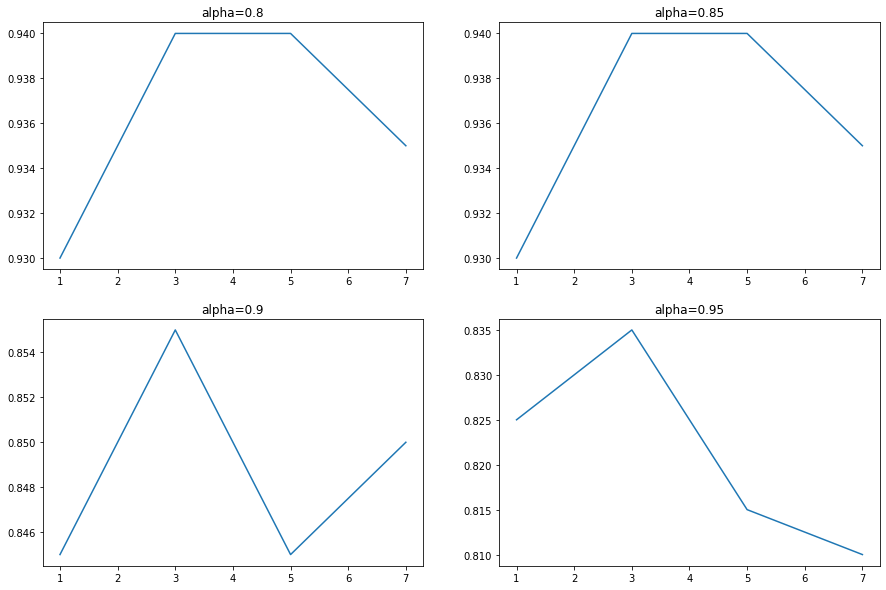

In [39]:
k=np.array([1,3,5,7])
figure, axis= plt.subplots(2,2, figsize=(15,10))
axis[0, 0].plot(k, accuracies[0:4])
axis[0, 0].set_title("alpha=0.8")

axis[0, 1].plot(k, accuracies[4:8])
axis[0, 1].set_title("alpha=0.85")

axis[1, 0].plot(k, accuracies[8:12])
axis[1, 0].set_title("alpha=0.9")

axis[1, 1].plot(k, accuracies[12:16])
axis[1, 1].set_title("alpha=0.95")

plt.show()

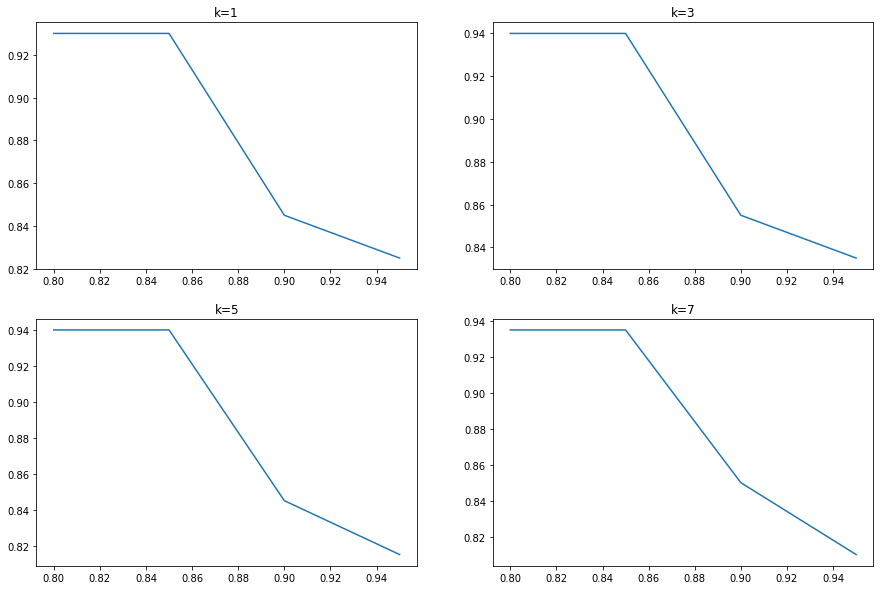

In [40]:
figure, axis= plt.subplots(2,2, figsize=(15,10))
axis[0, 0].plot(alpha, accuracies[0:16:4])
axis[0, 0].set_title("k=1")

axis[0, 1].plot(alpha, accuracies[1:16:4])
axis[0, 1].set_title("k=3")

axis[1, 0].plot(alpha, accuracies[2:16:4])
axis[1, 0].set_title("k=5")

axis[1, 1].plot(alpha, accuracies[3:16:4])
axis[1, 1].set_title("k=7")

plt.show()

Compare LDA results for different K

In [41]:
LDAaccuracies = np.array([])
kArray=np.array([])
for k in range(1, 8, 2):
    LDAaccuracies =  np.append(LDAaccuracies, knn(projectedTrain.T, projectedTest.T, trainLabel, testLabel,k ))
    kArray= np.append(kArray, k)

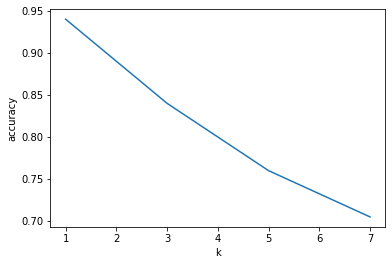

In [42]:
plt.plot(kArray, LDAaccuracies)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

## Part 8.b : Bonus


PCA variation: Kernel PCA

In [52]:
components=np.array([37,53,77,116])
kpcaAccuracies=np.array([])
for c in components:
  for k in range(1,8,2):
    pca=KernelPCA(n_components=c, kernel="rbf")
    trainKernel=pca.fit_transform(trainData)
    testKernel=pca.fit_transform(testData)
    kpcaAccuracies = np.append(kpcaAccuracies,knn(trainKernel,testKernel,trainLabel,testLabel,k))

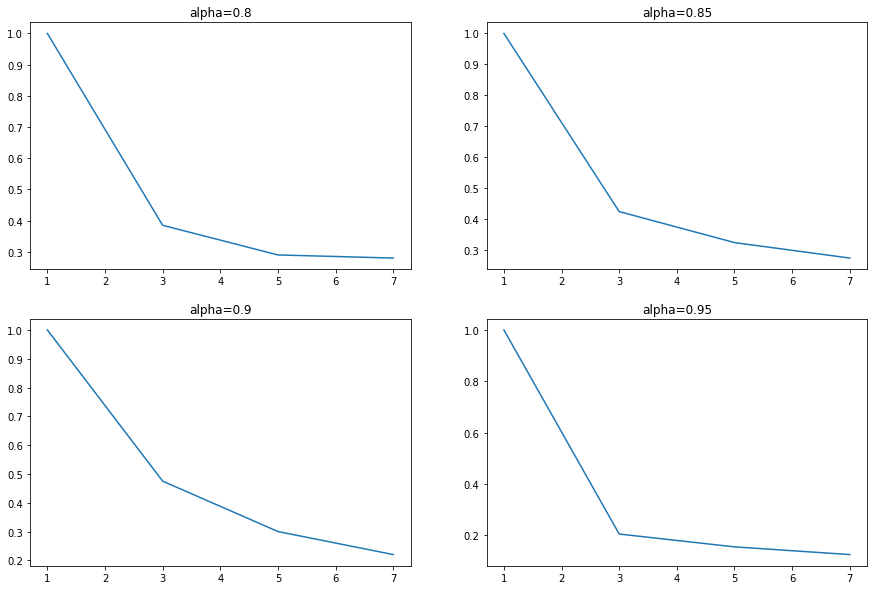

In [53]:
k=np.array([1,3,5,7])
figure, axis= plt.subplots(2,2, figsize=(15,10))
axis[0, 0].plot(k, kpcaAccuracies[0:4])
axis[0, 0].set_title("alpha=0.8")

axis[0, 1].plot(k, kpcaAccuracies[4:8])
axis[0, 1].set_title("alpha=0.85")

axis[1, 0].plot(k, kpcaAccuracies[8:12])
axis[1, 0].set_title("alpha=0.9")

axis[1, 1].plot(k, kpcaAccuracies[12:16])
axis[1, 1].set_title("alpha=0.95")

plt.show()

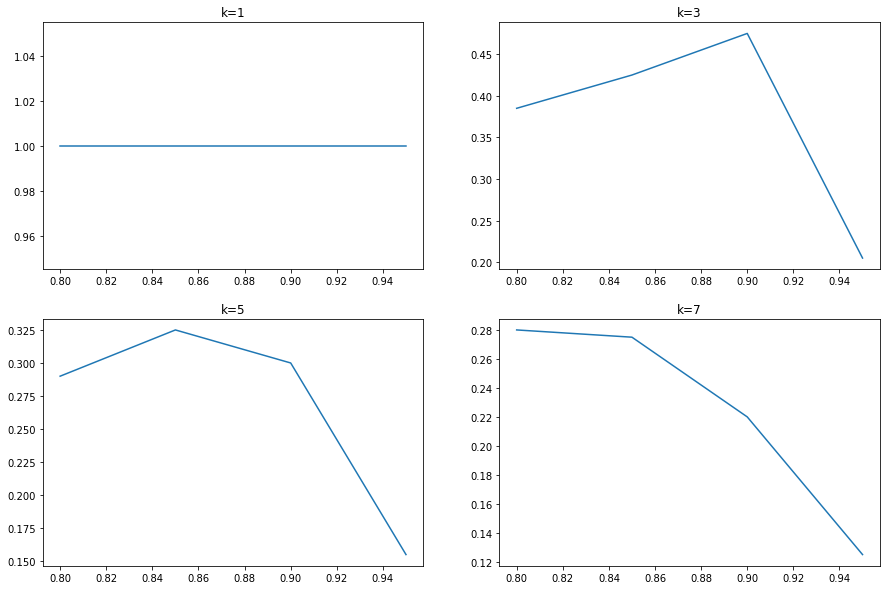

In [54]:
figure, axis= plt.subplots(2,2, figsize=(15,10))
axis[0, 0].plot(alpha, kpcaAccuracies[0:16:4])
axis[0, 0].set_title("k=1")

axis[0, 1].plot(alpha, kpcaAccuracies[1:16:4])
axis[0, 1].set_title("k=3")

axis[1, 0].plot(alpha, kpcaAccuracies[2:16:4])
axis[1, 0].set_title("k=5")

axis[1, 1].plot(alpha, kpcaAccuracies[3:16:4])
axis[1, 1].set_title("k=7")

plt.show()

Compare the accuracy between the original PCA and the Kernel PCA

In [48]:
print("PCA Accuracy:", a3)
print("Kernel pca accuracy:",kpcaAccuracies[0])

PCA Accuracy: 0.94
Kernel pca accuracy: 1.0
